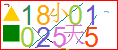

In [1]:
import base64, cv2, numpy as np
from PIL import Image
from IPython.display import Image as im
import matplotlib.pyplot as plt
# base64转图片 
base = """ 
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAHYAAAAyCAYAAACJbi9rAAAHr0lEQVR42u2c+29TZRjH+2/gD/4BmviDxB8NYhDnBROiEYPhEk0gEDVLLCaIgckl+2GkJMYEijPi4hxeCho7gyHQRC2BpWMxLE1kUmq5lDHmyibbamGP55ydy/O+572d60q3N3my7pz2NN3nPN/n9nYJSCRgyVrPEsaDpdVaa9GAHW4DyOeWwN67Mw5jf47A5M1q64Dt1T5nf3d0f8uuruYGe/SZNuhe9RJ8/foG+Pz5V+DLNa/B+F+lFgCbXBxQeWBnJ6eI30/v2Q9/HP8upHesQu+xdfBE12HIq77kbve8txGWjBHsOTg7+CQcJewAXDWBeoM6A6d3DcL29SW4tJAxdmaiBl+8uNaR5EKweFw5v1OD6gFsPsGAimy4HCnYWnUTBZS0sxPerjeaLWpQmwCsBXd+pU2w6YBQFcFacVE3OvHBwCsRgZ044EAsnUMnrsHG3yy4m2BoxivUJgFrLx2qZR5Xvn8dgqoCVvPEfg5U+rwrIcq5IdJgK7IM+RoMFVlQrXjKP89al44MIqjNBLawhQSr/66y/snCBgR0wzFFKcZxtSLz6KT8OA3WuL7Ag2f6IMOQWyKe2h49H2/ZKUUVOhHQzl3FZgObcJt0XYR9COq+Ee3QyOHwwFaSDLCWJycVpDjHvb4TW0VJkpNUsWPtBPQgqD1D2qGhki+wjftzMNt4EDLYwnI2WP24Ctj+i84hVbBSKUZxFkuxBbuiGGOt51NJ2NWSKbPFPnicm/U6cpypXuODPYKo+wC785sSfHD8ivHz45NlGCpPhQG2wIFqeW3Bm0Qog8UeqZo8mTcDK1MWJU+WdNuvQ/HzVLuvOMxdPsBO1x1PLd2egT2ZqyGAFUH1k0h5AcutYS3TgNylADE6S3NzDUlWjNSh4g2Y7dkRghWB9gk2rQg2HR1Y1TqWkwxNz9yCTPYxeblDxGunnGFL7MKCDR5jVaB69Vo/MZbViMDA84cMII3Gv3D8h0che/pp+CXXBj+eegr6TjwCv1/YqlDHWu+3ApJduyWxM1ywq/dmYwRbSHsDW0iHCxbHV2m54zxndvYOVEd/hZu3cjA6dg7q/9WUGxSJT1eYsTw+KY4EKhdso+YRqmmNWnhg8wmFaYzmZT9JMmfFzhNZyqiCDZ48xQvW1YxQtS0hgUUyLOsFK90AYrCsJj4ud2oKYGWSzQL7alRQmWD9equq13oFK/PEgGB5kxm6QcFesgaFCGw+5uSJ24xQteXxSjHvBjBitFUOmc9D15KO2+yWoqDJr9JSbMqsOIoVZvIkfQ47s1abn8rip4/4ugRWodwRjfRYMuwJKu2RdKxFUD2M7YzSZkd+sYNlwGWZhz1MfravhDloNzLgJY/lSC6vnRgBVFaS5PLg22NQPjgG9WYHm+hIBLItqnPamJbynqTh63C5vRjArsD4bQnUWD94C4MNbeeg7pUavOqwv5fHDjU+sPxdfvrq6OhQzCRJMwbXEqhTvSredh2mpGDFHslbh97U/rbPySz58IFVTT7YcK2tmgLbVYVRrqfWYfxgCGANmfYDtgwn1rYiWMEuP1a5QMPFG8A6s2RNQez4QzsUSPmdhKpC/FOLv96vsXpvpwlOS/RutIwU+yvwbbhoExhPch24RVi5n5EkmbFR6pFKYL1dw4irN7qj88gFA8vZ5afSktPh2tAYUosuYG8Woz2ayHQVyxHeqp+5IgVrxPLeSRLsQHIe7DvdrQM2aBN951a3zLJi8Mq3+GDtxAn9wdnQiiHaddhjZcEpM4amcq0DNoyxlyxbTnT1CDzWSZzKZ+pMgKLyZe7Bfbc3agogK3mc0qaseaoJNqM9zrS5k6aBhw5sOINqEVg9nuIEyh2HrcRJYgyZrk9PQmb3y9CYvWdfR785jMcC7yfr1ZxCNhyhTC8sWPnWEhqu00lCm7FZcdhOnByvZco0Q6onbozA9x+9MA+WqmGnevnZMQHWTpyQ1+KVQueikOqowYaxGcyC62S9ZH3LzJpRi5Ann1ierefoMPt2rDDg2jcA9mrtuvRNwuwuWYmTSHKxPA8sQrAiqMxsWHkhuUZeOy/BznnyxtBjN+m1/luGuei8ttmlGEPt6PiM+C7M9rZPAn9+W5IZsdblrVgN0PFAveBURLG2mZMnwlOpb61ZZdCyZe2GBatRGU0MYbfJzLg1Lw/c4LflOPkwgA1e7hDjNgrqe++mXFfyC5ftsSwJdsv4yRCaH7F5rA4miKXNjeNBGhREa5Ca7FiJEqsUcrwXNf8F5QkbrApUU37tBI32bFTDymJnXGBDWz53+RFQKU8VjelowE45I2oFOsmTkel6GM/ZEkwN6O0bIqUyucnxy6GmBetjCEA28RlfGvbcuGfXsO5atgLVg+qy6o6rVDNEVwlc7vCgpWIc24W68Niuf7Nwlx89mdG7StsClTTkLJaES89pA471rKsOT6IbA8mxCy51LorWYtSb2WSD9vd7WHuSJqD7jQHYvPpb2Kb9FA7a14uGBfJBO8+bw1kUQJaFLcFxgaWTJLzLj/cvAP4+PwLta36GTav6NLAXAoAFZhy8HMaM1svCshzlron4wYo6SeTa+OxX8OHbWeg7Mgi18elQ3xPfWC2/Fuu/tWWFhdYEu2Qk5Bb4PP8D0nSQyjvGSbUAAAAASUVORK5CYII=
"""
def base64_to_img(base64str):
    imgdata = base64.b64decode(base64str)
    img_np = np.frombuffer(imgdata, dtype=np.uint8)
    return cv2.imdecode(img_np, flags=1), im(imgdata)
img = base64_to_img(base.split(',')[1])
displayImage = img[1]
img = img[0]
displayImage

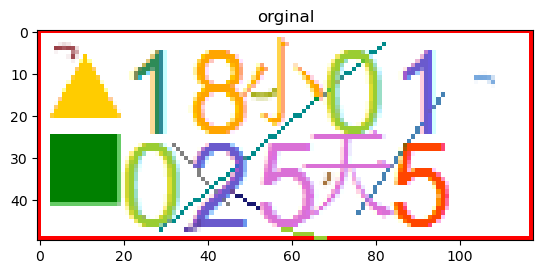

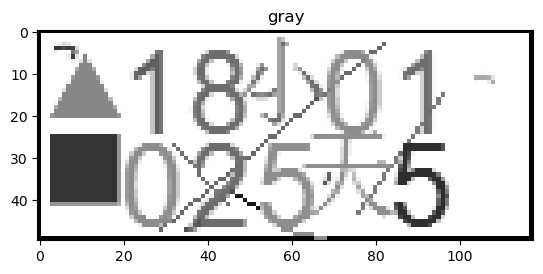

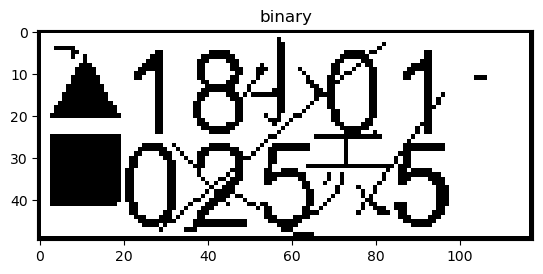

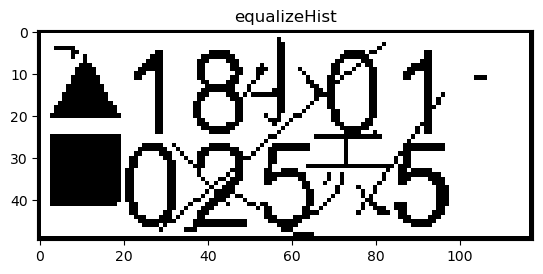

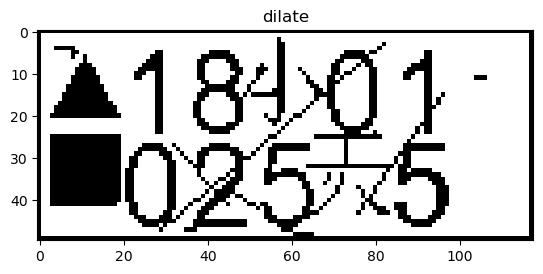

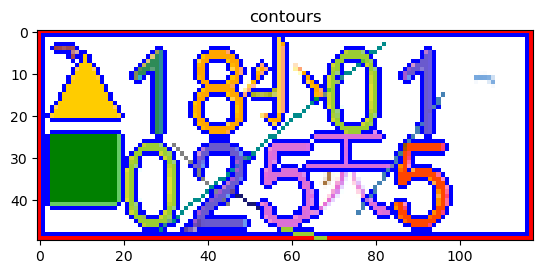

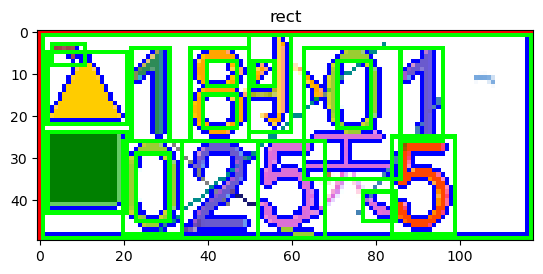

In [7]:
# 对图片从中心切为上下两张
def split_img(img):
    h, w, _ = img.shape
    return img[:h//2, :], img[h//2:, :]

# 原始图像
# img1 = cv2.cvtColor(split_img(img)[1], cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title('orginal')
plt.imshow(img1)
plt.show()

# 灰度图像
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.title('gray')
plt.imshow(gray, cmap='gray')
plt.show()

# 二值化
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.title('binary')
plt.imshow(binary, cmap='gray')
plt.show()

# 直方图均衡化
eq = cv2.equalizeHist(binary)
plt.title('equalizeHist')
plt.imshow(eq, cmap='gray')
plt.show()

# 膨胀
kernel = np.zeros((1, 1), np.uint8)
dilate = cv2.dilate(eq, kernel, iterations=1)
plt.title('dilate')
plt.imshow(dilate, cmap='gray')
plt.show()

# 找轮廓
contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
areaCount = 10
contours = [c for c in contours if cv2.contourArea(c) > areaCount]
# 画轮廓
img2 = cv2.drawContours(img1, contours, -1, (0, 0, 255), 1)
plt.title('contours')
plt.imshow(img2)
plt.show()

for ctr in contours:
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 1)
plt.title('rect')
plt.imshow(img1)
plt.show()